In [ ]:
from engine import Value
from visualization import draw_dot

An autograd engine tracks your computations to simplify the propagation of gradients for updating a model's weights

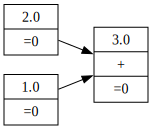

In [2]:
a = Value(1.0)
b = Value(2.0)
c = a + b

draw_dot(c)

The gradients are currently unfilled, as we haven't called the `backward()` method yet to initiate backpropagation. Let's do that now:

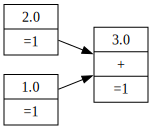

In [3]:
c.backward()
draw_dot(c)

We can see here that the gradients both populated to 1.0, let's check if that's right:
$$ c = a + b $$
$$ \frac{\partial c}{\partial a} = 1.0 \qquad \frac{\partial c}{\partial a} = 1.0 $$
Alright its correct. Let's try a more involved example:

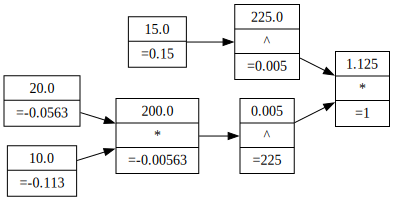

In [4]:
a = Value(10)
b = Value(20)
c = Value(15)
d = a * b
e = c**2
f = e / d
f.backward()
draw_dot(f)

$$ f = \frac{e}{d} : \qquad \qquad \frac{\partial f}{\partial e} = \frac{1}{d} = \frac{1}{200} = 0.005 \qquad \frac{\partial f}{\partial d} = -\frac{e}{d^2} = -\frac{225}{40 000} = -0.005625 $$

$$ e = c^2 : \qquad \qquad \frac{\partial f}{\partial c} = \frac{\partial f}{\partial e}\frac{\partial e}{\partial c} = 0.005 \times 2c = 0.15 $$

$$ d = a \times b : \qquad \qquad \frac{\partial f}{\partial a} = \frac{\partial f}{\partial d}\frac{\partial d}{\partial a} = -0.005625 b = -0.1125 \qquad \frac{\partial f}{\partial b} = \frac{\partial f}{\partial d}\frac{\partial d}{\partial b} = -0.005625 a = -0.05625 $$

Although the computation graph shows some intermediate steps which we have skipped in our computation, we can clearly see that we get exactly the same gradient values as displayed above.

A key behaviour of this autograd engine is that is supports arbitrary tensor operations. This means we can propagate gradients based on complex matrix multiplications or across broadcasted dimensions. Since it supports all necessary elementary operations and activation functions, this engine can easily be used in machine learning applications like neural networks. For this reason, I have also built out a neural network library on top of the engine:

In [ ]:
from nn import MLP

model = MLP(2, 3, 1)

$$ c = a \times b \quad \text{(element-wise)} $$
$$ c_{ij} = a_{i} b_{j} $$
$$ \frac{\partial c_{ij}}{\partial a_i} = b_j \qquad \frac{\partial c_{ij}}{\partial b_j} = a_i $$
$$ L = \sum_i \sum_j c_{ij} \quad \text{Example scalar loss based on matrix} $$
$$ \frac{\partial L}{\partial a_i} = \sum_j \frac{\partial L}{\partial c_{ij}} \frac{\partial c_{ij}}{\partial a_i} = \sum_j \frac{\partial c_{ij}}{\partial a_i} = \sum_j b_j \qquad \frac{\partial L}{\partial b_j} = \sum_i \frac{\partial L}{\partial c_{ij}} \frac{\partial c_{ij}}{\partial b_j} = \sum_i \frac{\partial c_{ij}}{\partial b_j} = \sum_i a_i $$
<br>

$$
a = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \quad b = \begin{bmatrix} 10 & 20 & 30 \end{bmatrix} \quad c = a @ b = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} \begin{bmatrix} 10 & 20 & 30 \end{bmatrix} = \begin{bmatrix} 10 & 20 & 30 \\ 20 & 40 & 60 \\ 30 & 60 & 90 \end{bmatrix}
$$
$$
a = \begin{bmatrix} a_1 \\ a_2 \\ a_3 \end{bmatrix} \quad b = \begin{bmatrix} b_1 & b_2 & b_3 \end{bmatrix} \quad c = a @ b = \begin{bmatrix} a_1 \\ a_2 \\ a_3 \end{bmatrix} \begin{bmatrix} b_1 & b_2 & b_3 \end{bmatrix} = \begin{bmatrix} a_1 b_1 & a_1 b_2 & a_1 b_3 \\ a_2 b_1 & a_2 b_2 & a_2 b_3 \\ a_3 b_1 & a_3 b_2 & a_3 b_3 \end{bmatrix}
$$
$$
\frac{\partial c}{\partial a_1} = \begin{bmatrix} b_1 & b_2 & b_3 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix} \quad
\frac{\partial c}{\partial a_2} = \begin{bmatrix} 0 & 0 & 0 \\ b_1 & b_2 & b_3 \\ 0 & 0 & 0 \end{bmatrix} \quad
\frac{\partial c}{\partial a_3} = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ b_1 & b_2 & b_3 \end{bmatrix}
$$

In [9]:
a = Value(10)
b = Value(20)
c = Value(2)
d = a + b
e = d * c
loss = 0.2 * e

loss.backward()

$$ \frac{\mathrm{dL}}{\mathrm{dL}} = 1.0 $$
$$ \mathrm{L} = 0.2 \mathrm{e} \implies \frac{\mathrm{dL}}{\mathrm{de}} = 0.2 $$
$$ \mathrm{e} = \mathrm{d} \times \mathrm{c} \implies \frac{\mathrm{de}}{\mathrm{dd}} = \mathrm{c} \quad \frac{\mathrm{de}}{\mathrm{dc}} = \mathrm{d} $$
$$ \mathrm{d} = \mathrm{a} + \mathrm{b} \implies \frac{\mathrm{dd}}{\mathrm{da}} = 1 \quad \frac{\mathrm{dd}}{\mathrm{db}} = 1$$

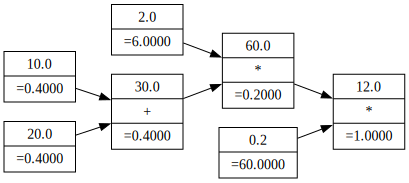

In [10]:
dot = draw_dot(loss)
dot

In [11]:
a = Value([5, 3])
b = Value([6.5, 5])
c = Value([7.2, 10])
d = a **0.5
e = d + c
loss = e.dot(b)

loss.backward()

print(loss.data, loss.grad)
print(e.data, e.grad)
print(d.data, d.grad)
print(a.data, a.grad)
print(b.data, b.grad)
print(c.data, c.grad)


dot = draw_dot(loss)
dot

119.99469589159301 1.0
[ 9.43606798 11.73205081] [6.5 5. ]
[2.23606798 1.73205081] [6.5 5. ]
[5. 3.] [1.45344419 1.44337567]
[6.5 5. ] [ 9.43606798 11.73205081]
[ 7.2 10. ] [6.5 5. ]


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
def MSE(pred, target):
    assert isinstance(pred, Value) and isinstance(target, Value), "Both pred and target must be instances of Value"
    assert pred.data.shape == target.data.shape, "pred and target must have the same shape"
    diff = pred - target
    return (diff ** 2).sum() / 2

In [ ]:
model = MLP(2, [3, 1])

x = Value([1, 2])
y = Value(1)

In [ ]:
for i in range(200):
    pred = model(x)
    # print(pred)
    loss = (pred - y) ** 2
    print(loss)
    loss.backward()
    for param in model.parameters():
        param.data -= 0.01 * param.grad  # Simple gradient descent step
    model.zero_grad()


AttributeError: 'Value' object has no attribute 'T'